## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET, sep = ',')
countries = pd.read_csv(COUNTRIES_DATASET, decimal = ',')

happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [5]:
happiness.index
countries.index
happiness.dtypes
countries.dtypes
countries['country_name']
happiness['country']

0      Afghanistan
1          Albania
2          Algeria
3        Argentina
4          Armenia
          ...     
130      Venezuela
131        Vietnam
132          Yemen
133         Zambia
134       Zimbabwe
Name: country, Length: 135, dtype: object

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [6]:
# Write your code here
happiness['id'] = happiness['country'].str.lower()
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,id
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia


In [7]:
country_features = pd.merge(countries, happiness, left_on = 'country_name', right_on = 'id')
country_features.head()
#country_features.index

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,id
0,afghanistan,647500,31056997,36.0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan
1,albania,28748,3581655,86.5,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania
2,algeria,2381740,32930091,70.0,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria
3,argentina,2766890,39921833,97.1,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina
4,armenia,29800,2976372,98.6,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [8]:
# Write your code here
country_features.index = country_features['country']
top_10_countries = country_features.sort_values(ascending=False, by=['happiness_score']).head(10)
top_10_countries.head()

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,id
country,,,,,,,,,,,,,
Finland,finland,338145,5231372,100.0,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,finland
Denmark,denmark,43094,5450661,100.0,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,denmark
Switzerland,switzerland,41290,7523934,99.0,Switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,switzerland
Iceland,iceland,103000,299388,99.9,Iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,iceland
Norway,norway,323802,4610820,100.0,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,norway


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [9]:
# Write your code here
country_features_h = country_features.set_index(['world_region', 'country_name'])
country_features_h.index

world_regions_features = country_features.groupby(country_features.world_region)
world_regions_features.agg('mean').head(10)
#world_regions_features.mean().head() #equivalent from the line before
#world_regions_features.agg('sum').head(10)

#find the number of countries in one world region
#world_regions_features.size()

#create an empty data frame

summary = pd.DataFrame({'countries','happiness_score'})
summary['happiness_score'] = country_features.groupby(country_features.world_region).agg('mean')['happiness_score']
summary['countries'] = world_regions_features.size()
summary.head()

country_features.head()
len(country_features)
country_features.size

#world_regions_features['happiness_score_mean'] = country_features.groupby('world_region').agg('mean')['happiness_score']
#world_regions_features.head

# conclusion
#world_regions_features = country_features.groupby(country_features.world_region).agg('mean')['happiness_score']
#world_regions_features.head

1755

The first region has only a few countries! What are them and what is their score?

In [10]:
# Write your code here
world_regions_features = country_features.groupby(country_features.world_region)
world_regions_features.agg('mean').sort_values(by = 'happiness_score', ascending=False)

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption
world_region,,,,,,,,,
North America and ANZ,6.892905e+06,8.897084e+07,98.250000,7.173525,0.933842,72.177067,0.907045,0.164180,0.431717
Western Europe,1.858432e+05,1.983251e+07,98.280000,6.967405,0.917773,72.821632,0.857978,0.040858,0.523861
Latin America and Caribbean,9.948965e+05,2.706073e+07,86.450000,5.971280,0.853971,66.878195,0.829322,-0.075523,0.795991
Central and Eastern Europe,9.115057e+04,8.757194e+06,97.750000,5.891393,0.883027,68.452411,0.780868,-0.139980,0.844670
Southeast Asia,4.764104e+05,6.663549e+07,85.050000,5.517788,0.829054,65.429071,0.914866,0.112021,0.712395
East Asia,3.846304e+06,4.814232e+08,95.900000,5.483633,0.873150,68.864882,0.800610,-0.110081,0.757347
Commonwealth of Independent States,1.841737e+06,2.334013e+07,98.725000,5.358342,0.856729,64.726558,0.784004,-0.041285,0.746387
Middle East and North Africa,7.082456e+05,2.483428e+07,74.756250,5.269306,0.794934,65.505087,0.714194,-0.079573,0.757591
Sub-Saharan Africa,4.770120e+05,1.832049e+07,61.090625,4.393856,0.694164,55.641572,0.728991,-0.002495,0.765513


In [11]:
world_regions_features.get_group('North America and ANZ')

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,id
country,,,,,,,,,,,,,
Australia,australia,7686850,20264082,100.0,Australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,australia
Canada,canada,9984670,33098932,97.0,Canada,7.2321,0.927177,73.601601,0.933913,0.124771,0.390843,North America and ANZ,canada
New Zealand,new zealand,268680,4076140,99.0,New Zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,new zealand
United States,united states,9631420,298444215,97.0,United States,6.9396,0.914219,68.299500,0.842620,0.149892,0.699715,North America and ANZ,united states


In [12]:
a = country_features.groupby(country_features.world_region)
#
b = country_features.groupby('world_region')['happiness_score']
c = b.agg(['mean'])
c['count'] = b.agg('count')
d = a.agg('mean')

type(d)
c

,mean,count
world_region,,
Central and Eastern Europe,5.891393,14
Commonwealth of Independent States,5.358342,12
East Asia,5.483633,3
Latin America and Caribbean,5.971280,20
Middle East and North Africa,5.269306,16
North America and ANZ,7.173525,4
South Asia,4.355083,6
Southeast Asia,5.517788,8
Sub-Saharan Africa,4.393856,32


In [13]:
country_features

,country_name,area,population,literacy,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,id
country,,,,,,,,,,,,,
Afghanistan,afghanistan,647500,31056997,36.0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan
Albania,albania,28748,3581655,86.5,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania
Algeria,algeria,2381740,32930091,70.0,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria
Argentina,argentina,2766890,39921833,97.1,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina
Armenia,armenia,29800,2976372,98.6,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,venezuela,912050,25730435,93.4,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,venezuela
Vietnam,vietnam,329560,84402966,90.3,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,vietnam
Yemen,yemen,527970,21456188,50.2,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,yemen


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [25]:
# Write your code here
# check how to print in a beautiful manner

litt = country_features[country_features.literacy >= 100][['world_region','country','happiness_score']]
for x, y in litt.iterrows():
    print('{} - {} ({})'.format(y.world_region,x,y.happiness_score))

#print(world_regions_features.country)

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [32]:
# Write your code here
type(country_features.literacy.mean())
country_features.describe()

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption
count,1.350000e+02,1.350000e+02,133.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,9.007829e+05,4.552204e+07,81.851128,5.525062,0.815165,64.762495,0.790657,-0.022749,0.727447
std,2.244994e+06,1.505270e+08,20.514483,1.123414,0.116311,6.694776,0.117230,0.146165,0.180406
min,3.160000e+02,2.993880e+05,17.600000,2.566900,0.468671,48.003624,0.396573,-0.300907,0.109784
25%,6.540500e+04,4.636146e+06,70.000000,4.749000,0.740405,59.809444,0.720287,-0.130953,0.675699
50%,2.375000e+05,1.023546e+07,90.900000,5.541500,0.836419,66.480164,0.811602,-0.042309,0.780623
75%,7.000570e+05,2.967980e+07,98.400000,6.292700,0.910313,69.145870,0.886453,0.083279,0.848558
max,1.707520e+07,1.313974e+09,100.000000,7.808700,0.974670,76.804581,0.974998,0.519587,0.935585


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [45]:
# Write your code here
unlitt = country_features[country_features.literacy <= 50]
t = unlitt.country_name.count()/country_features.country_name.count()
print("The proportion is {:.2%}".format(t))
var1 = 1
print("hello {:.2%} world".format(var1)) 
country_features.dtypes

The proportion is 11.85%
hello 100.00% world


country_name                 object
area                          int64
population                    int64
literacy                    float64
country                      object
happiness_score             float64
social_support              float64
healthy_life_expectancy     float64
freedom_of_choices          float64
generosity                  float64
perception_of_corruption    float64
world_region                 object
id                           object
dtype: object

Print the raw number and the percentage of world population that is illiterate.

In [54]:
# Write your code here
# definition of illiterate ? 
country_features['illiterate_pop'] = country_features.apply(lambda x : x.population*(100-x.literacy)/100,axis=1)
illiterate_people = country_features.population * (100 - country_features.literacy)/100
print(country_features.illiterate_pop.sum())
print(illiterate_people.sum())

1249372988.1030002
1249372988.1030002


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [55]:
# Write your code here
country_features['population_density'] = country_features.apply(lambda x : x.population/x.area, axis =1)
# apply lambda

What is the happiness score of the 3 countries with the lowest population density?

In [60]:
# Write your code here
country_features.sort_values('population_density',ascending=True)['happiness_score'][:3]
country_features.dtypes

country_name                 object
area                          int64
population                    int64
literacy                    float64
country                      object
happiness_score             float64
social_support              float64
healthy_life_expectancy     float64
freedom_of_choices          float64
generosity                  float64
perception_of_corruption    float64
world_region                 object
id                           object
illiterate_pop              float64
population_density          float64
dtype: object

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>

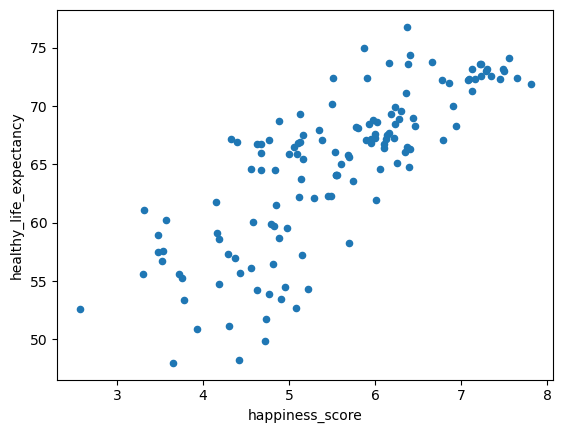

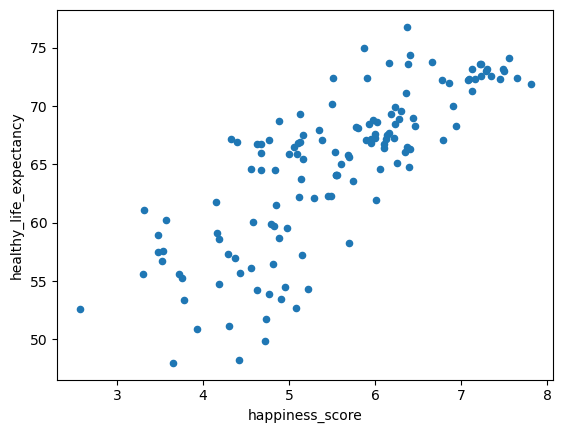

In [62]:
# Write your code here
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')
country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.